In [1]:
#We imported the appropriate packages in order to analyze the data and plot the graphs
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from networkx.algorithms import bipartite
import numpy as np

In [196]:
#This was used to read in the business data set. We had to use 7-zip to extract all data twice. 
#Rachel and Tabitha extracted the files and imported them as dataframes.

business_df = pd.read_json('business.json', lines=True)

In [ ]:
#We used the code below to review the business data set.
# business_df.head()

In [197]:
#This was used to read in the tip data set. We had to use 7-zip to extract all data twice. 
#Rachel and Tabitha extracted the files and imported them as dataframes.

tip_df = pd.read_json('tip.json', lines=True)

In [ ]:
#We used the code below to review the tip data set.
#tip_df.head()

In [4]:
#In order to narrow down the business categories to coffee shops we had to know what categories existed, we ran the code below.
# business_df['categories'].value_counts().head(60)

In [198]:
# This code was used to isolate businesses in Montreal. Tabitha wrote this code.

cityisMontreal = business_df['city']=='MontrÃ©al'

In [ ]:
#This was used to check that only businesses in Montreal were retained in our dataframe
#print(cityisMontreal.head())

In [6]:
#We used this code to rename the dataframe. Erica wrote this code. 
MontrealBusiness = business_df[cityisMontreal]

In [8]:
#These were used to review our new dataframe
#MontrealBusiness.head()
#MontrealBusiness.shape

In [7]:
#This code was used to get rid of the special characters in the spelling of Montreal. Rachel wrote this part.
MontrealBusiness.city = MontrealBusiness.city.replace({'MontrÃ©al':'Montreal'})
# MontrealBusiness.tail(100)

In [199]:
#We decided to remove all of the columns that we did not need so we specified which colums we wanted in out updated dataframe.
#Cara executed this code.
MontrealBusiness=MontrealBusiness[["attributes", 'categories', 'city', 'name', 
                                   'review_count','stars', 'business_id', 'longitude', 'latitude']]

In [13]:
# MontrealBusiness.head()

In [14]:
#We used this to get the counts of businesses that are catergorized as "Coffee & Tea" or "Cafe".
# MontrealBusiness['categories'].value_counts().head(80)

In [9]:
#This code only kept businesses associated with coffee in our data set. 
#Haley wrote this code 
MontrealBusiness_Coffee = MontrealBusiness[MontrealBusiness['categories'].isin(['Coffee & Tea, Food', 'Food, Coffee & Tea',
                                                                                'Cafes, Restaurants', 'Restaurants, Cafes'])]
# MontrealBusiness_Coffee.head(60)
#MontrealBusiness_Coffee.shape


In [16]:
#We used this to analyze the dataframe
# MontrealBusiness_Coffee.groupby('name').stars.mean()
# MontrealBusiness_Coffee.shape

In [10]:
#We then used this code to section out the business that have 4 stars or more.
#Shelby wrote this code.
best = MontrealBusiness_Coffee['stars'] >=4.0

In [19]:
# print(best)

In [11]:
#This code put all of the business with 4 starts or more into a separate dataframe. 
#Erica wrote this code.
Best_Coffee = MontrealBusiness_Coffee[MontrealBusiness_Coffee.stars >= 4.0]

In [12]:
#We used this code to sort the entries by the number of stars the business had.
#Rachel wrote this code.
Best_Coffee.sort_values(by = ['stars'], inplace=True, ascending=False)
# Best_Coffee.head(60)

In [13]:
# Best_Coffee.groupby('stars').review_count.mean()

In [14]:
#This was used to further section off our dataframe by using only the places that had 10 or more reviews.
#Cara wrote this code.
Better_Coffee = Best_Coffee[Best_Coffee.review_count >= 10.0]
#Better_Coffee.head()

In [16]:
#This code read in the user data set. 
#Shelby ran this code.
user = pd.read_json('user.json', lines=True)

In [17]:
#This was used to drop the columns from user that were unneccessary. 
#Haley and Shelby worked on this code. 
user.drop(['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 
           'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 
           'compliment_writer', 'funny', 'yelping_since'], axis=1, inplace=True)

In [18]:
#This was used to reduce the user set to only the reviewers that had elite status in 2018.
#Shelby, Cara, and Haley worked on this code.
user_elite_title = user[user.elite.str.contains('2018')]

In [19]:
#user_elite_title.head(60)

In [21]:
#We used this to merge the business and tip data set. 
#Everyone in the group worked on troubleshooting this code and getting the new merged Dataframe to run.
bizz_tips = Better_Coffee.merge(tip_df, on='business_id', how='inner', indicator=True)
#bizz_tips


In [22]:
#We used this to merge the new bizz_tips dataframe and the user data set. 
#We all worked on this. 
bizz_tips_use = bizz_tips.merge(user_elite_title, on='user_id', how='inner')
#bizz_tips_use

In [23]:
# Here, we renamed and rearranged the columns to make it easier to read. 
#Erica, Tabitha, and Rachel 
bizz_tips_use.rename(columns={'name_x':'bizz_name','name_y':'user_name','review_count_x':'bizz_review_count', 'review_count_y':'user_review_count'}, inplace=True) 
bizz_tips_use = bizz_tips_use[['business_id','bizz_name','longitude','latitude','bizz_review_count','stars','user_id','user_name','user_review_count','useful','elite','text']]
#bizz_tips_use.columns


In [24]:
#bizz_tips_use.head()

In [25]:
#Created an influence score based on the number of times marked as useful divided by the number of reviews by a user. 
#Higher influence score means more influence.
#Cara, Shelby, and Erica
bizz_tips_use['influence'] = ((bizz_tips_use.useful / bizz_tips_use.user_review_count))

In [26]:
#bizz_tips_use.head()

In [58]:
#Rachel, Tabitha, and Haley
bizz_tips_use.sort_values(by = ['influence'], inplace=True, ascending=False)
bizz_tips_use

,business_id,bizz_name,longitude,latitude,bizz_review_count,stars,user_id,user_name,user_review_count,useful,elite,text,influence
9,NzLwCjZKriWw3n8RNZwRKA,MELK Bar Ã CafÃ©,-73.622689,45.475294,51,4.5,pn_flI3EBNugBEYFp9okxQ,Colanie,536,10108,"2016,2017,2018",Hidden by construction. Go up middle ramp turn...,18.858209
10,NzLwCjZKriWw3n8RNZwRKA,MELK Bar Ã CafÃ©,-73.622689,45.475294,51,4.5,pn_flI3EBNugBEYFp9okxQ,Colanie,536,10108,"2016,2017,2018","Get the brownie cookie, more cakey than chewy ...",18.858209
43,A0neyJHiOUqhKVhrURCEfA,Second Cup,-73.573566,45.509432,24,4.0,ooHF-vRzlkyN9UEVMKocAQ,Mercedes,752,10465,"2015,2016,2017,2018",Second Cup Served Its Purpose To Be Opened Til...,13.916223
40,v11nL8xtY2ZPP8ADyPectQ,CafÃ© Plume,-73.587934,45.518711,54,4.0,dK4m2dTVJM-XqWSPL91Q5Q,Gabriel,351,3359,"2013,2014,2015,2016,2017,2018",Beans from Santa Cruz! Who would have thought!,9.569801
58,nIroO3-n_GqxlUMvhNjxEQ,Le Couteau,-73.584397,45.524874,41,4.0,GHoG4X4FY8D8L563zzPX5w,Hannah,3956,28051,"2013,2014,2015,2016,2017,2018",Look for the knife sign,7.090748
57,nIroO3-n_GqxlUMvhNjxEQ,Le Couteau,-73.584397,45.524874,41,4.0,GHoG4X4FY8D8L563zzPX5w,Hannah,3956,28051,"2013,2014,2015,2016,2017,2018",Free wifi,7.090748
14,pkO54EbPl6E57Q0yu2XYRA,Cafe Myriade,-73.577898,45.496102,189,4.5,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Nice caramel touch to LattÃ©!,6.987805
17,v11nL8xtY2ZPP8ADyPectQ,CafÃ© Plume,-73.587934,45.518711,54,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Oh they carry Fernwood beans now!,6.987805
18,A0neyJHiOUqhKVhrURCEfA,Second Cup,-73.573566,45.509432,24,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Great place to hangout for coffee and wifi acc...,6.987805
19,8WQZjkDWV3P-ZuF8BDEi0w,Lapin PressÃ©,-73.584204,45.533172,33,4.0,bUPeHBFEINhqiKj9-k4-zA,Charles,82,573,"2013,2014,2015,2016,2017,2018",Excellent coffee shop to chill out on Saturday...,6.987805


In [28]:
#bizz_tips_use['bizz_name'].value_counts().head(60)

In [29]:
# bizz_tips_use['user_id'].value_counts().head(80)
#bizz_tips_use['latitude'].value_counts().head(80)

In [30]:
#bizz_tips_use.user_id

In [31]:
#bizz_tips_use.isnull().sum()

In [137]:
#We created nodes for the bipartite graph using user and cafe as the two sets of nodes.
#Cara and Shelby 
user = set(bizz_tips_use.user_name)

In [138]:
cafe = set(bizz_tips_use.bizz_name)

In [139]:
# cafe

In [140]:
# user

In [178]:
#Sim is the name of the bipartite graph we created. 
#Haley and Tabitha
sim = nx.DiGraph()

In [179]:
#We added node attributes in the form of roles
#Erica and Rachel
sim.add_nodes_from(user, bipartite='user_name', role='reviewer')

In [180]:
sim.add_nodes_from(cafe, bipartite='bizz_name', role='business')

In [181]:
#We created this templist for the edges and added edge weight based on influence. 
#Tabitha, Rachel, and Shelby
templist = tuple(zip(bizz_tips_use.user_name, bizz_tips_use.bizz_name))
#templist

In [182]:
sim.add_edges_from(templist, weight=bizz_tips_use.influence)

In [184]:
#print(nx.info(sim))

In [185]:
#bipartite.is_bipartite(sim)

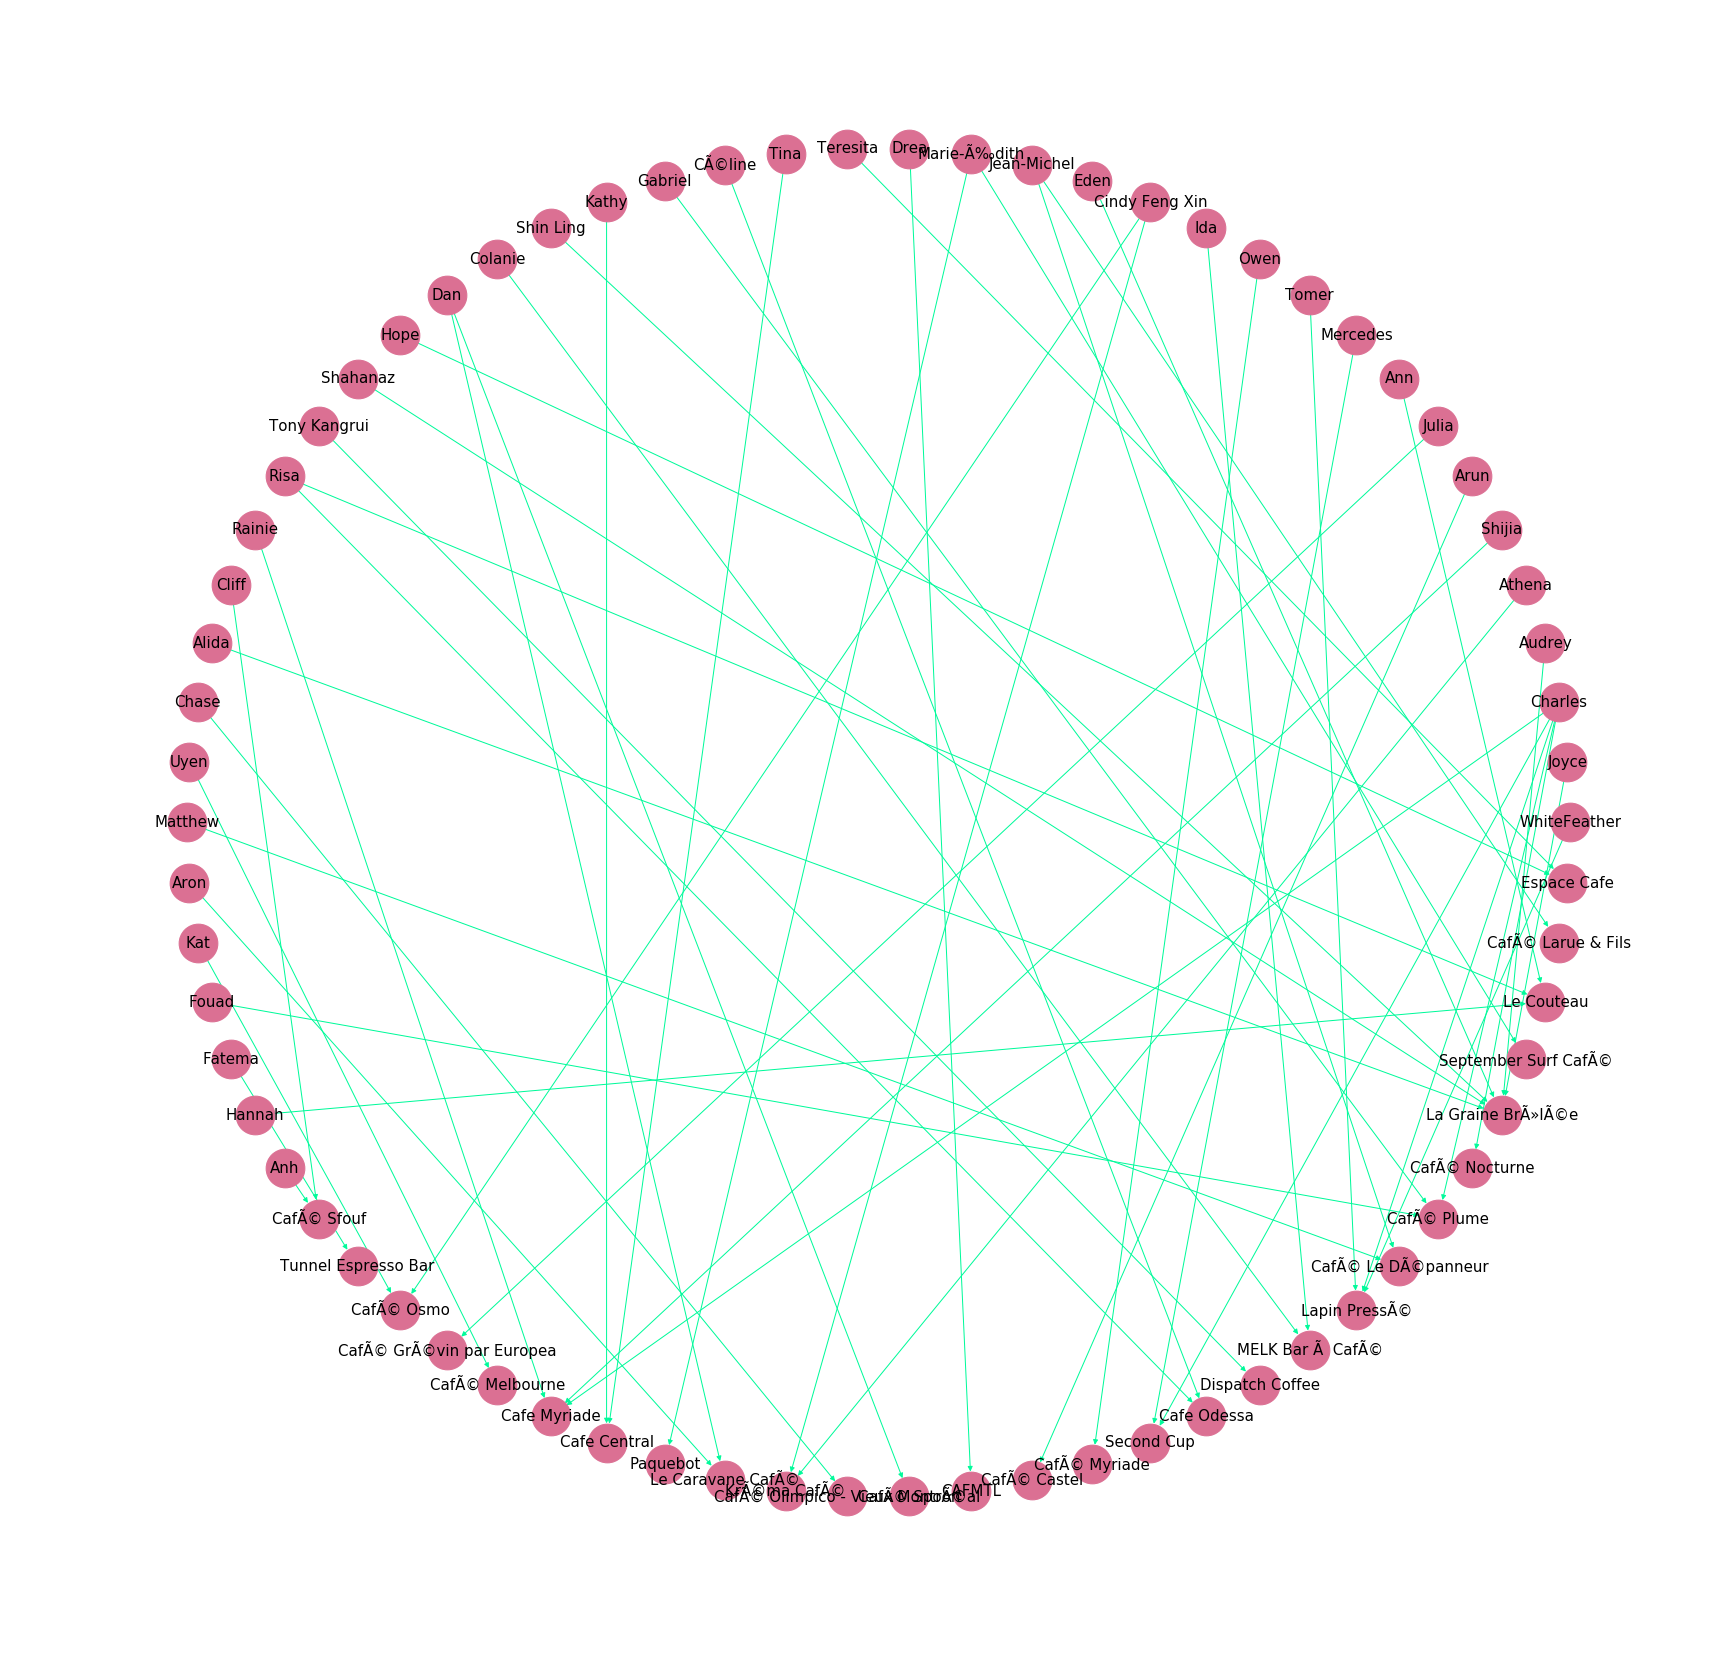

In [215]:
#This code created our figure for the bipartite graph. 
#We did this together and chose the circle layout to make it easier to read. 
plt.figure(figsize = (30,30))
#pos = nx.bipartite_layout(sim, user, scale = 250)
pos = nx.circular_layout(sim, scale = 250)
nx.draw_networkx(sim, pos, node_size = 1500, node_color='palevioletred', node_shape = 'o', edge_color='mediumspringgreen', font_size=15, font_color='black')
labels = nx.get_edge_attributes(sim, 'weight')
plt.axis('off')
plt.show()

In [187]:
#function to make recomendations based on similarity
#Tabitha and Erica
def rec_cafe(sim, user1, user2):
    if sim.node[user1]['bipartite'] == sim.node[user2]['bipartite']:
        nbrs1 = sim.neighbors(user1)
        nbrs2 = sim.neighbors(user2)
        difference = set(nbrs1).difference(nbrs2)
        return difference

In [192]:
#function to see which businesses two reviewers have both been to
#Shelby and Haley
def same_cafe(sim, user1, user2):
    if sim.node[user1]['bipartite'] == sim.node[user2]['bipartite']:
        nbrs1 = sim.neighbors(user1)
        nbrs2 = sim.neighbors(user2)
        overlap = set(nbrs1).intersection(nbrs2)
        return overlap

In [193]:
#We tested the functions to make sure they returned the appropriate values. 
#Cara
print(rec_cafe(sim, 'Ann', 'Tina'))

{'Le Couteau'}


In [195]:
print(same_cafe(sim, 'Colanie', 'Ida'))

{'MELK Bar Ã\xa0 CafÃ©'}


In [223]:
# We used this to help determine which users the recommendations would be better suited for. 
#Tabitha and Erica
nx.degree_centrality(sim)

{'WhiteFeather': 0.014492753623188406,
 'Joyce': 0.014492753623188406,
 'Charles': 0.07246376811594203,
 'Audrey': 0.014492753623188406,
 'Athena': 0.014492753623188406,
 'Shijia': 0.014492753623188406,
 'Arun': 0.014492753623188406,
 'Julia': 0.014492753623188406,
 'Ann': 0.014492753623188406,
 'Mercedes': 0.014492753623188406,
 'Tomer': 0.014492753623188406,
 'Owen': 0.014492753623188406,
 'Ida': 0.014492753623188406,
 'Cindy Feng Xin': 0.028985507246376812,
 'Eden': 0.014492753623188406,
 'Jean-Michel': 0.028985507246376812,
 'Marie-Ã‰dith': 0.028985507246376812,
 'Drea': 0.014492753623188406,
 'Teresita': 0.014492753623188406,
 'Tina': 0.014492753623188406,
 'CÃ©line': 0.014492753623188406,
 'Gabriel': 0.014492753623188406,
 'Kathy': 0.014492753623188406,
 'Shin Ling': 0.014492753623188406,
 'Colanie': 0.014492753623188406,
 'Dan': 0.028985507246376812,
 'Hope': 0.014492753623188406,
 'Shahanaz': 0.014492753623188406,
 'Tony Kangrui': 0.014492753623188406,
 'Risa': 0.02898550724637

In [103]:
# This was used to make our second graph with clustered our restaurants and the users that reviewed them
# to show which users had a greater review influence on a particular business
#Shelby, Rachel, and Cara
btu = nx.from_pandas_edgelist(bizz_tips_use, "user_name", 'bizz_name', create_using = nx.Graph())

In [174]:
#print(nx.info(btu))

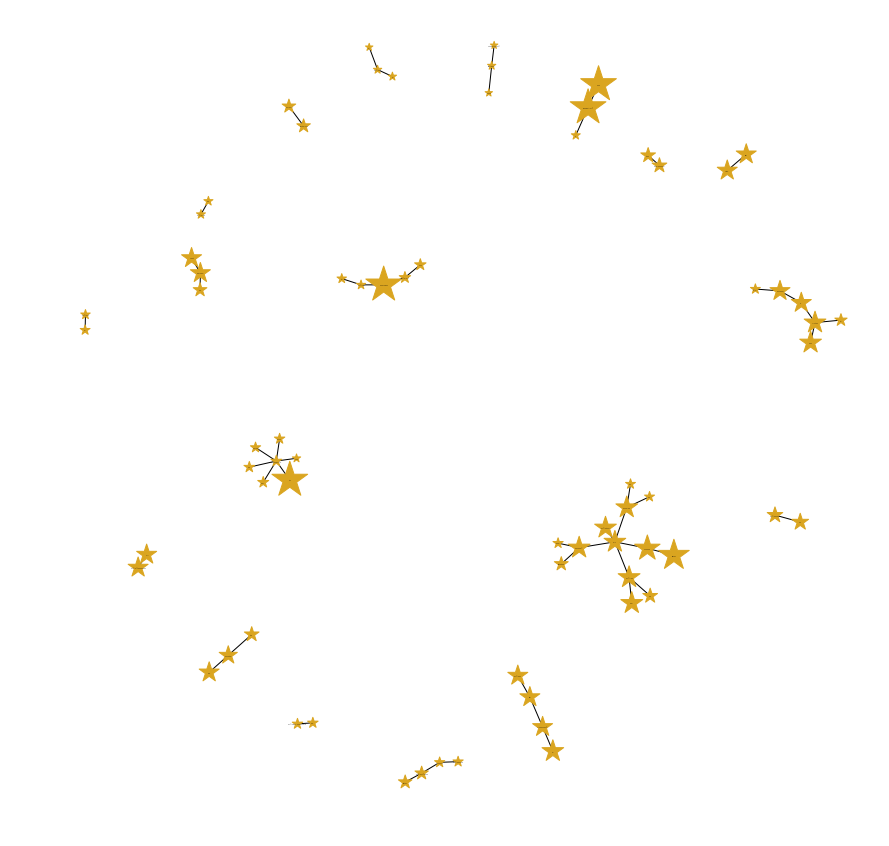

In [216]:
#Who are the most influential Yelpers for the best coffee shops in Montreal. 
#The node size was set based on the influence score of a given user.
#Haley, Erica, and Tabitha

plt.figure(figsize = (15,15))
nx.draw_networkx(btu, node_color = 'goldenrod', node_size = 75*(bizz_tips_use.influence), node_shape = '*', 
                 edge_color='black', font_size=0,font_color='black') 
plt.axis('off')
plt.show()

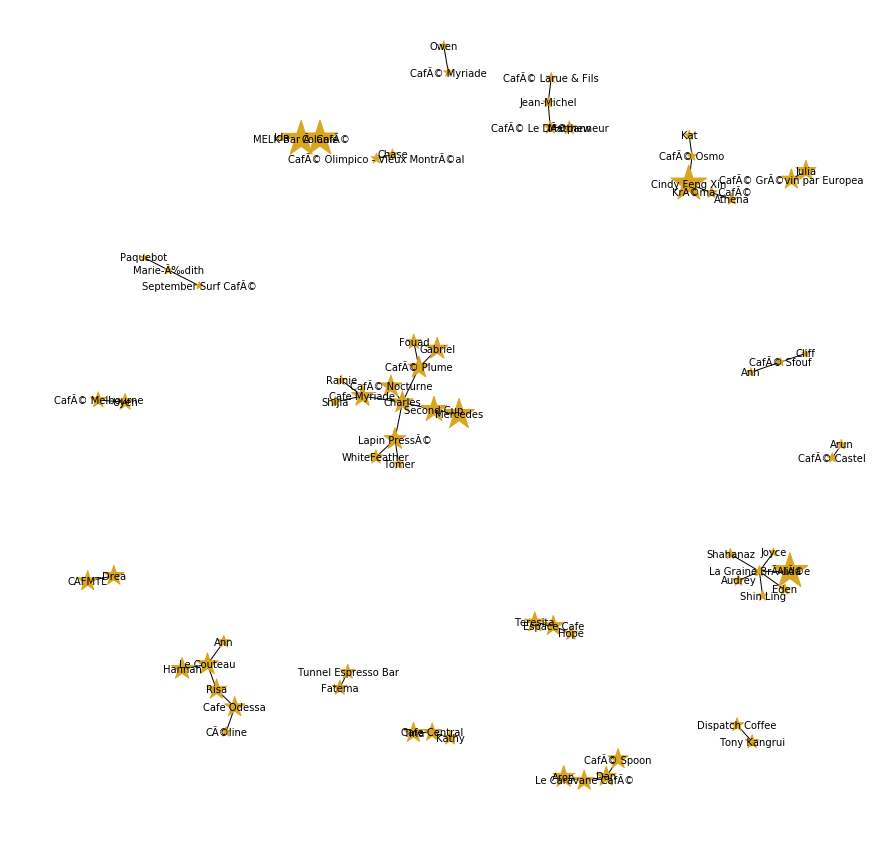

In [217]:
#Added the names to the above graph. 

plt.figure(figsize = (15,15))
nx.draw_networkx(btu, node_color = 'goldenrod', node_size =75*(bizz_tips_use.influence), node_shape = '*', 
                 edge_color='black', font_size=10,font_color='black') 
plt.axis('off')
plt.show()

In [224]:
#Betweenness centrality was used to determine which important users (nodes) connect other nodes.
#Degree centrality was used to help determine how many coffee shops a person has reviewed.
#nx.degree_centrality(btu)
nx.betweenness_centrality(btu)

{'Colanie': 0.0,
 'MELK Bar Ã\xa0 CafÃ©': 0.00042625745950554135,
 'Mercedes': 0.0,
 'Second Cup': 0.004688832054560955,
 'Gabriel': 0.0,
 'CafÃ© Plume': 0.008951406649616368,
 'Hannah': 0.0,
 'Le Couteau': 0.0029838022165387893,
 'Charles': 0.023870417732310314,
 'Cafe Myriade': 0.008951406649616368,
 'Lapin PressÃ©': 0.008951406649616368,
 'CafÃ© Nocturne': 0.0,
 'Aron': 0.0,
 'Le Caravane CafÃ©': 0.0008525149190110827,
 'Risa': 0.002557544757033248,
 'Cafe Odessa': 0.0017050298380221654,
 'Teresita': 0.0,
 'Espace Cafe': 0.00042625745950554135,
 'Julia': 0.0,
 'CafÃ© GrÃ©vin par Europea': 0.0,
 'Drea': 0.0,
 'CAFMTL': 0.0,
 'Dan': 0.0008525149190110827,
 'CafÃ© Spoon': 0.0,
 'Tina': 0.0,
 'Cafe Central': 0.00042625745950554135,
 'Uyen': 0.0,
 'CafÃ© Melbourne': 0.0,
 'Fouad': 0.0,
 'Fatema': 0.0,
 'Tunnel Espresso Bar': 0.0,
 'Kathy': 0.0,
 'WhiteFeather': 0.0,
 'Hope': 0.0,
 'Tony Kangrui': 0.0,
 'Dispatch Coffee': 0.0,
 'Matthew': 0.0,
 'CafÃ© Le DÃ©panneur': 0.0008525149190110827